# HW7

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# load data and generate x, y, sigy arrays
data1   = np.genfromtxt('Riggs.dat')
x = data1[:, 0]
y = data1[:, 1]
sigy = np.sqrt(y)

<ErrorbarContainer object of 3 artists>

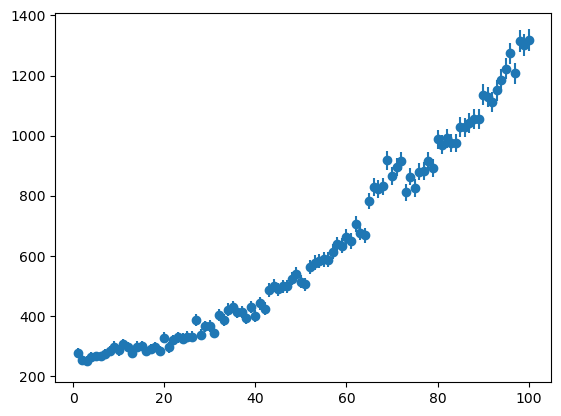

In [26]:
plt.errorbar(x, y, sigy, fmt='o')

We need to solve for $$\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{E}^{-1} \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{E}^{-1} \mathbf{D}$$ where $\mathbf{G}$ is the $N \times M$ design matrix ($N=100$ and $M=4$ in our case), $\mathbf{E}$ is the $N \times N$ data covariance matrix (here, it is diagonal), and $\mathbf{D}$ is the response vector.

In [7]:
# variance vector
vars = np.array(sigy*sigy)
vars

array([ 277.00000,  254.00000,  252.00000,  265.00000,  266.00000,
        266.00000,  274.00000,  285.00000,  299.00000,  286.00000,
        307.00000,  297.00000,  277.00000,  299.00000,  300.00000,
        283.00000,  290.00000,  297.00000,  284.00000,  328.00000,
        296.00000,  321.00000,  330.00000,  325.00000,  331.00000,
        332.00000,  388.00000,  339.00000,  366.00000,  368.00000,
        345.00000,  403.00000,  388.00000,  422.00000,  431.00000,
        413.00000,  415.00000,  394.00000,  431.00000,  401.00000,
        443.00000,  425.00000,  487.00000,  502.00000,  489.00000,
        499.00000,  499.00000,  525.00000,  540.00000,  515.00000,
        506.00000,  563.00000,  578.00000,  583.00000,  589.00000,
        588.00000,  615.00000,  639.00000,  635.00000,  664.00000,
        650.00000,  706.00000,  678.00000,  669.00000,  783.00000,
        830.00000,  823.00000,  832.00000,  918.00000,  865.00000,
        896.00000,  916.00000,  812.00000,  864.00000,  826.00

In [8]:
# data covariance matrix (diagonal of variances; no covariance)
E = np.diag(vars)
E

array([[ 277.00000,  0.00000,  0.00000, ...,  0.00000,  0.00000,
         0.00000],
       [ 0.00000,  254.00000,  0.00000, ...,  0.00000,  0.00000,
         0.00000],
       [ 0.00000,  0.00000,  252.00000, ...,  0.00000,  0.00000,
         0.00000],
       ...,
       [ 0.00000,  0.00000,  0.00000, ...,  1314.00000,  0.00000,
         0.00000],
       [ 0.00000,  0.00000,  0.00000, ...,  0.00000,  1301.00000,
         0.00000],
       [ 0.00000,  0.00000,  0.00000, ...,  0.00000,  0.00000,
         1317.00000]])

In [9]:
# inverse of E
Einv = np.linalg.inv(E)
Einv

array([[ 0.00361,  0.00000,  0.00000, ...,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00394,  0.00000, ...,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00397, ...,  0.00000,  0.00000,  0.00000],
       ...,
       [ 0.00000,  0.00000,  0.00000, ...,  0.00076,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00000, ...,  0.00000,  0.00077,  0.00000],
       [ 0.00000,  0.00000,  0.00000, ...,  0.00000,  0.00000,  0.00076]])

The design matrix is $N \times M$.

In [10]:
# first row of the design matrix G is the constant term.
G1 = np.ones_like(x)
G1

array([ 1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,
        1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00

In [27]:
# second row is the linear term
G2 = x
G2

array([ 1.00000,  2.00000,  3.00000,  4.00000,  5.00000,  6.00000,
        7.00000,  8.00000,  9.00000,  10.00000,  11.00000,  12.00000,
        13.00000,  14.00000,  15.00000,  16.00000,  17.00000,  18.00000,
        19.00000,  20.00000,  21.00000,  22.00000,  23.00000,  24.00000,
        25.00000,  26.00000,  27.00000,  28.00000,  29.00000,  30.00000,
        31.00000,  32.00000,  33.00000,  34.00000,  35.00000,  36.00000,
        37.00000,  38.00000,  39.00000,  40.00000,  41.00000,  42.00000,
        43.00000,  44.00000,  45.00000,  46.00000,  47.00000,  48.00000,
        49.00000,  50.00000,  51.00000,  52.00000,  53.00000,  54.00000,
        55.00000,  56.00000,  57.00000,  58.00000,  59.00000,  60.00000,
        61.00000,  62.00000,  63.00000,  64.00000,  65.00000,  66.00000,
        67.00000,  68.00000,  69.00000,  70.00000,  71.00000,  72.00000,
        73.00000,  74.00000,  75.00000,  76.00000,  77.00000,  78.00000,
        79.00000,  80.00000,  81.00000,  82.00000,  83.00000

In [28]:
# third row is the quadratic term
G3 = x*x
G3

array([ 1.00000,  4.00000,  9.00000,  16.00000,  25.00000,  36.00000,
        49.00000,  64.00000,  81.00000,  100.00000,  121.00000,
        144.00000,  169.00000,  196.00000,  225.00000,  256.00000,
        289.00000,  324.00000,  361.00000,  400.00000,  441.00000,
        484.00000,  529.00000,  576.00000,  625.00000,  676.00000,
        729.00000,  784.00000,  841.00000,  900.00000,  961.00000,
        1024.00000,  1089.00000,  1156.00000,  1225.00000,  1296.00000,
        1369.00000,  1444.00000,  1521.00000,  1600.00000,  1681.00000,
        1764.00000,  1849.00000,  1936.00000,  2025.00000,  2116.00000,
        2209.00000,  2304.00000,  2401.00000,  2500.00000,  2601.00000,
        2704.00000,  2809.00000,  2916.00000,  3025.00000,  3136.00000,
        3249.00000,  3364.00000,  3481.00000,  3600.00000,  3721.00000,
        3844.00000,  3969.00000,  4096.00000,  4225.00000,  4356.00000,
        4489.00000,  4624.00000,  4761.00000,  4900.00000,  5041.00000,
        5184.00000,  5

In [29]:
# fourth row is the signal term
eriggs = 68.8
sige   = 2.6
G4 = np.exp(-(x-eriggs)**2/(2*sige*sige))
G4

array([ 0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00001,  0.00003,  0.00018,  0.00082,  0.00325,
        0.01111,  0.03271,  0.08306,  0.18193,  0.34368,  0.55996,
        0.78691,  0.95377,  0.99705,  0.89897,  0.69908,  0.46889,
        0.27124,  0.13534,  0.05824,  0.02162,  0.00692,  0.00191,
        0.00045,  0.00009,  0.00002,  0.00000,  0.00000,  0.00000,
        0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00

In [30]:
# stack them vertically and take transpose
G = np.vstack([G1, G2, G3, G4]).T
G

array([[ 1.00000,  1.00000,  1.00000,  0.00000],
       [ 1.00000,  2.00000,  4.00000,  0.00000],
       [ 1.00000,  3.00000,  9.00000,  0.00000],
       [ 1.00000,  4.00000,  16.00000,  0.00000],
       [ 1.00000,  5.00000,  25.00000,  0.00000],
       [ 1.00000,  6.00000,  36.00000,  0.00000],
       [ 1.00000,  7.00000,  49.00000,  0.00000],
       [ 1.00000,  8.00000,  64.00000,  0.00000],
       [ 1.00000,  9.00000,  81.00000,  0.00000],
       [ 1.00000,  10.00000,  100.00000,  0.00000],
       [ 1.00000,  11.00000,  121.00000,  0.00000],
       [ 1.00000,  12.00000,  144.00000,  0.00000],
       [ 1.00000,  13.00000,  169.00000,  0.00000],
       [ 1.00000,  14.00000,  196.00000,  0.00000],
       [ 1.00000,  15.00000,  225.00000,  0.00000],
       [ 1.00000,  16.00000,  256.00000,  0.00000],
       [ 1.00000,  17.00000,  289.00000,  0.00000],
       [ 1.00000,  18.00000,  324.00000,  0.00000],
       [ 1.00000,  19.00000,  361.00000,  0.00000],
       [ 1.00000,  20.00000,  400

In [31]:
# response vector
D = y
D

array([ 277.00000,  254.00000,  252.00000,  265.00000,  266.00000,
        266.00000,  274.00000,  285.00000,  299.00000,  286.00000,
        307.00000,  297.00000,  277.00000,  299.00000,  300.00000,
        283.00000,  290.00000,  297.00000,  284.00000,  328.00000,
        296.00000,  321.00000,  330.00000,  325.00000,  331.00000,
        332.00000,  388.00000,  339.00000,  366.00000,  368.00000,
        345.00000,  403.00000,  388.00000,  422.00000,  431.00000,
        413.00000,  415.00000,  394.00000,  431.00000,  401.00000,
        443.00000,  425.00000,  487.00000,  502.00000,  489.00000,
        499.00000,  499.00000,  525.00000,  540.00000,  515.00000,
        506.00000,  563.00000,  578.00000,  583.00000,  589.00000,
        588.00000,  615.00000,  639.00000,  635.00000,  664.00000,
        650.00000,  706.00000,  678.00000,  669.00000,  783.00000,
        830.00000,  823.00000,  832.00000,  918.00000,  865.00000,
        896.00000,  916.00000,  812.00000,  864.00000,  826.00

In [17]:
# this is the parameter covariance matrix
np.linalg.inv(np.dot(G.T, np.dot(Einv, G)))

array([[ 30.63258, -1.42469,  0.01281,  9.61143],
       [-1.42469,  0.09067, -0.00092, -0.66521],
       [ 0.01281, -0.00092,  0.00001,  0.00328],
       [ 9.61143, -0.66521,  0.00328,  216.33002]])

In [32]:
# this is the best-fit parameter vector
Ahat = np.dot(np.linalg.inv(np.dot(G.T, np.dot(Einv, G))), np.dot(G.T, np.dot(Einv, D)))
Ahat

array([ 266.40702,  0.24996,  0.10151,  120.71998])

Plot data and best-fit model.

In [33]:
def model(x, a, b, c, A):
    return a + b*x + c*x*x + A*np.exp(-(x-eriggs)**2/(2*sige*sige))

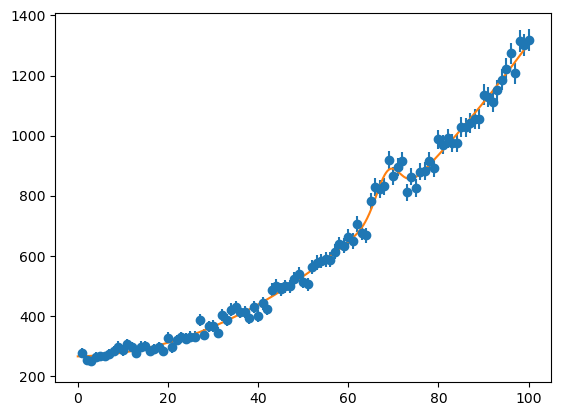

In [34]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 100, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')